In [85]:
# Pandas library in python to read the csv file.
import pandas as pd

# for numerical computaions use numpy library
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

 
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

##  Load the Data

In [86]:
# Create a pandas dataframe and assign it to variable.
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

## Data Analysis

In [87]:
# Print first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# Print Last 5 rows of the dataframe.
titanic_test.tail() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


There is no Survived column here which is our target varible we are trying to predict.



In [89]:
# gives shape of datase in (rows,columns)
titanic.shape

(891, 12)

In [90]:
# Describe gives us statistical information about numerical columns in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can check from count if there are missing values in columns, here 'age' has missing values.

Also we can see that 38% out of the training-set survived in Titanic.

We can also see that the passenger's age range from 0.4 to 80.

In [91]:
# unique values or range for feature set
print('Genders:', titanic['Sex'].unique())
print('Embarked:', titanic['Embarked'].unique())
print('Pclass:', titanic['Pclass'].unique())
print('Survived:', titanic['Survived'].unique())
print('SibSp Range:', titanic['SibSp'].min(),'-',titanic['SibSp'].max())
print('Parch Range:', titanic['Parch'].min(),'-',titanic['Parch'].max())
print('Family size range:', (titanic['Parch']+titanic['SibSp']).min(),'-',(titanic['Parch']+titanic['SibSp']).max())
print('Fare Range:', titanic['Fare'].min(),'-',titanic['Fare'].max())

Genders: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]
Survived: [0 1]
SibSp Range: 0 - 8
Parch Range: 0 - 6
Family size range: 0 - 10
Fare Range: 0.0 - 512.3292


In [92]:
# info method provides information about dataset like 
# total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Also Embarked and cabin has missing values.
 
 ##  Missing Values 
 
 First we will visulize missing values.In which column missing values are present?

We can see that Age, Embarked and cabin has missing values. now, lets check missing values for test data.

cabin, age and fare has missing values in test data.

In [93]:
# Let's write a function to print the total percentage of the missing values.
# (This can be a good excercise for beginers to try to write sample function like this)

# This function takes a Dataframe (df) as input and returns two columns,total missing values and total missing alues percentage
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total,percent], axis = 1 ,keys = ['total','percent'])

In [94]:
missing_data(titanic)

,total,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


now, lets check missing values for test data.

In [95]:
# check missing values in test dataset
missing_data(titanic_test)

,total,percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


 we will see how to deal with these missing valus next.

In [96]:
# COMPLETING: complete or delete missing values in train and test dataset
dataset = [titanic,titanic_test]

for data in dataset:
    # coplete missing age with median
    data['Age'].fillna(data['Age'].median(),inplace = True)
    
    # complete Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    # complete missing Fare with median
    data['Fare'].fillna(data['Fare'].median(),inplace = True)

In [97]:
missing_data(titanic)

,total,percent
Cabin,687,77.1
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


### Note: Column "Cabin" has more than 75% of missing values in both train and test dataset.
#### Suggestion: Not to impute missing data in columns, which have more than 40% of missing data.

In [98]:
titanic.drop(['Cabin'], axis=1, inplace = True)
titanic_test.drop(['Cabin'],axis=1,inplace=True)

In [99]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [101]:
missing_data(titanic)

,total,percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [102]:
age_analysis=titanic[titanic['Survived']==1]['Sex'].value_counts().reset_index().rename(columns={'index':'Sex','Sex':'count'})

Out of 342 survived travellers there are 233 female and 109 male.We can see that survival chance of female is more than  male.but for surety check total number of male and female. 

In [103]:
def draw(graph):
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha= "center")

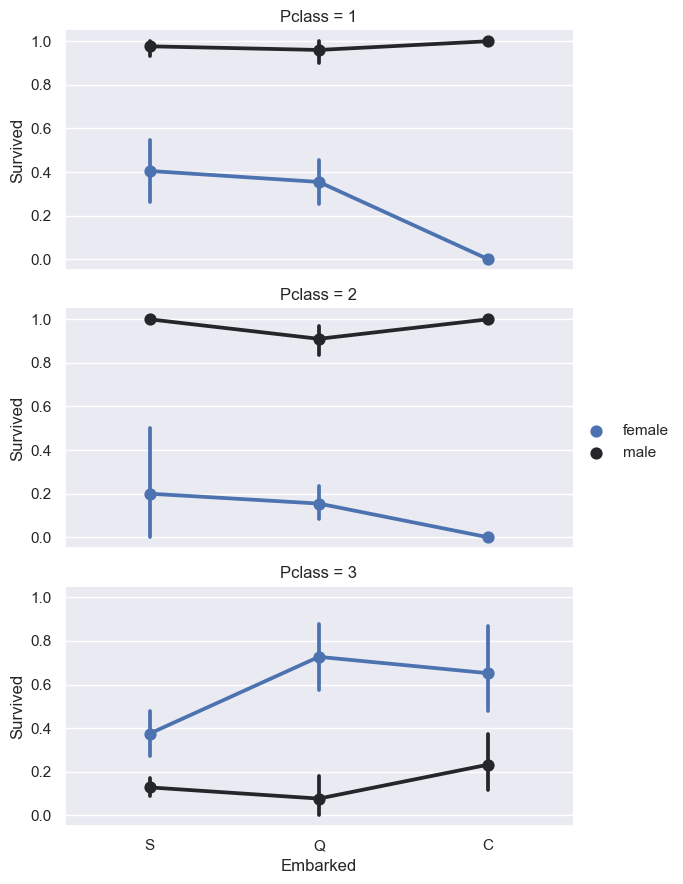

In [104]:
FGrid = sns.FacetGrid(titanic, row='Pclass', aspect=2)
FGrid.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FGrid.add_legend()

In [105]:
titanic.drop(['Embarked'], axis=1, inplace = True)
titanic_test.drop(['Embarked'],axis=1,inplace=True)

In [106]:
titanic=titanic.dropna()
titanic['age_category']=np.where((titanic['Age']<19),"below 19",
                                 np.where((titanic['Age']>18)&(titanic['Age']<=30),"19-30",
                                    np.where((titanic['Age']>30)&(titanic['Age']<=50),"31-50",
                                                np.where(titanic['Age']>50,"Above 50","NULL"))))
age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})

In [107]:
titanic_age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'count'})

In [108]:
titanic['survived_or_not']=np.where(titanic['Survived']==1,"Survived",np.where(titanic['Survived']==0,"Died","null")) # .head(2)'

sun_df=titanic[['Sex','survived_or_not','age_category','Fare']].groupby(['Sex','survived_or_not','age_category']).agg('sum').reset_index()

In [109]:
sur_age=titanic[titanic['Survived']==1]['Age']
un_age=titanic[titanic['Survived']==0]['Age']

In [110]:
# combine test and train as single to apply some function, we will use it again in Data Preprocessing
all_data=[titanic,titanic_test]

for dataset in all_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

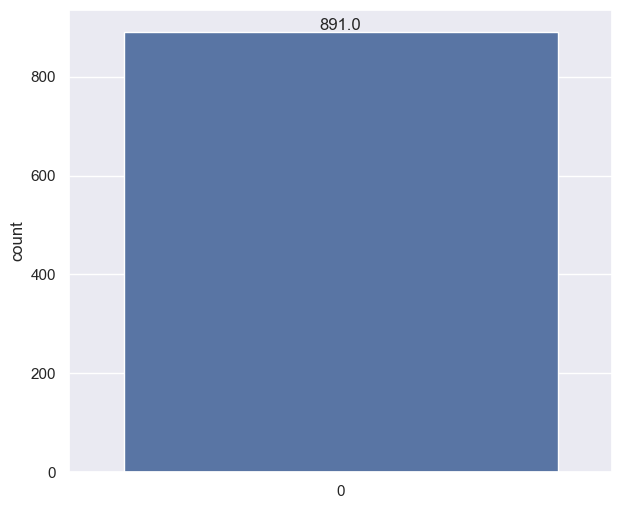

In [111]:
sns.set(style="darkgrid")
plt.figure(figsize = (7, 6))
x = sns.countplot(titanic['Family'])
draw(x)

In [112]:
surfamily_size = titanic[titanic['Survived'] == 1]

In [113]:
unfamily_size = titanic[titanic['Survived'] == 0]

**Now we will see whether Age is considerable with family size for higher probability of survival?**

In [114]:
# create bin for age features. 
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [115]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,10,50,100,550], labels=['Low_fare','medium_fare','Average_fare','high_fare'])

<Axes: xlabel='Pclass', ylabel='count'>

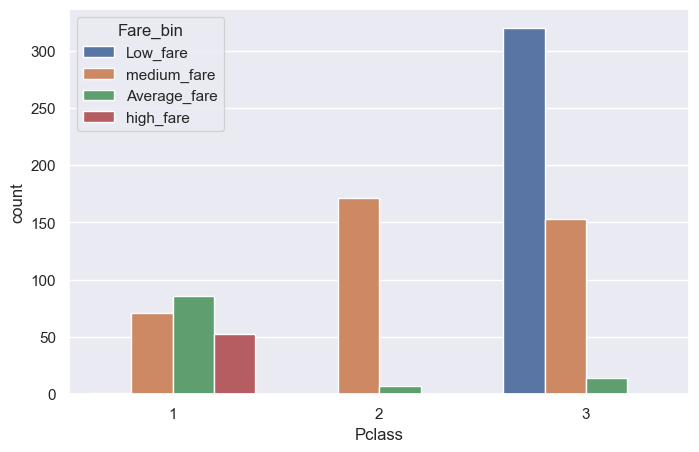

In [116]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Pclass', hue='Fare_bin', data=titanic)

## Feature Engineering

Feature engineering is the art of converting raw data into useful features.To help us get a better performance, we can create new features based on the original features of our dataset.

we will see first which are not numeric data and than after convert them into numeric data.

In [117]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  age_category     891 non-null    object  
 11  survived_or_not  891 non-null    object  
 12  Family           891 non-null    int64   
 13  Age_bin          891 non-null    category
 14  Fare_bin         876 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


We already have Survived column so we drop the colom with name "survived_or_not" 

In [118]:
drop_col= ["survived_or_not","age_category"]
titanic.drop(drop_col,axis=1,inplace=True)

In [119]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}

for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
titanic['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [120]:
for dataset in all_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 6
titanic['Age'].value_counts()

Age
3    222
2    139
4    133
5    116
6    101
1     97
0     83
Name: count, dtype: int64

As we created new fetures form existing one, so we remove that one.

Dropping SibSp & Parch because we have family now. same way Age.
We also going to remove some other features like passenger id in list, Ticket number and Name.

In [121]:
for dataset in all_data:
    drop_column = ['Age_bin','Fare','Name','Ticket', 'PassengerId','SibSp','Parch','Fare_bin']
    dataset.drop(drop_column, axis=1, inplace = True)

## Predictive Modeling

After all the preprocessing, we are now ready for building and evaluating different Machine Learning models.

We have seen some insights from the data analysis. But with that, we cannot accurately predict whether a passenger will survive or die. So now we will predict whether a Passenger will survive or not using some great Classification Algorithms.

In [122]:
all_features = titanic.drop("Survived",axis=1)
Targete = titanic["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targete,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 4), (268, 4), (623,), (268,))

In [123]:
titanic.head()

,Survived,Pclass,Sex,Age,Family
0,0,3,0,2,2
1,1,1,1,5,2
2,1,3,1,2,1
3,1,1,1,4,2
4,0,3,0,4,1


In [124]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targete,cv=10,scoring='accuracy')

print('The accuracy of the Random Forest Classifier is',acc_random_forest)
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

The accuracy of the Random Forest Classifier is 85.87
The cross validated score for Random Forest Classifier is: 79.57


In [125]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
c_mat = confusion_matrix(y_train, predictions)
print(c_mat)

[[331  50]
 [ 79 163]]


<Axes: >

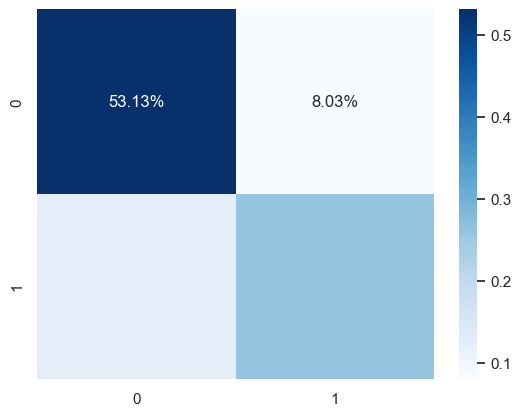

In [126]:
# we will see our confusion matrix in percentage.
sns.heatmap(c_mat/np.sum(c_mat), annot=True, 
            fmt='.2%', cmap='Blues')

### Precision and Recall:

precision refers to the percentage of results which are relevant, recall refers to the percentage of total relevant results correctly classified by our algorithm.

In [127]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7652582159624414
Recall: 0.6735537190082644


### F-Score

The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [128]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7164835164835165